In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

plt.style.use('fivethirtyeight')

In [2]:
#ordered by date of appointment
files = ['Thomas.csv',
         'Ginsburg.csv',
         'Breyer.csv',
         'Roberts.csv',
         'Alito.csv',
         'Sotomayor.csv',
         'Kagan.csv',
         'Gorsuch.csv',
         'Kavanaugh.csv']
names = ['Thomas',
         'Ginsburg',
         'Breyer',
         'Roberts',
         'Alito',
         'Sotomayor',
         'Kagan',
         'Gorsuch',
         'Kavanaugh']

Text(0.5, 1.0, '# Cases per Justice')

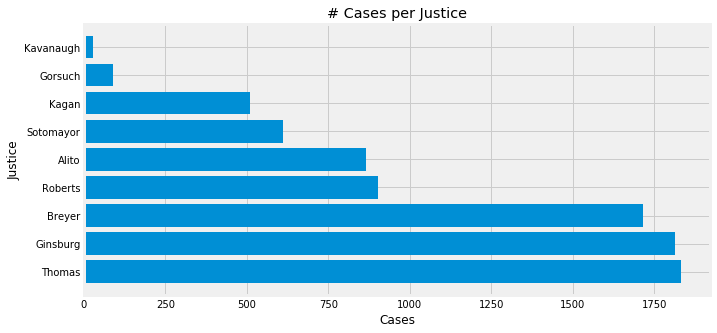

In [3]:
# Plotting cases per justice

cases = []
for file in files:
    fpath = 'data/clean/%s' % file
    df = pd.read_csv(fpath)
    cases.append(df.shape[0])

fig, ax = plt.subplots(figsize=(10, 5))

ax.barh(names, cases)
ax.set_xlabel('Cases')
ax.set_ylabel('Justice')
ax.set_title('# Cases per Justice')

In [4]:
# Plotting the number of words spoken by justice

words = []
for file in files:
    ct = 0
    fpath = 'data/clean/%s' % file
    df = pd.read_csv(fpath)
    for i, row in df.iterrows():
        ct += len(str(row['text']).split())
    words.append(ct)

Text(0.5, 1.0, 'Words Spoken by Justice')

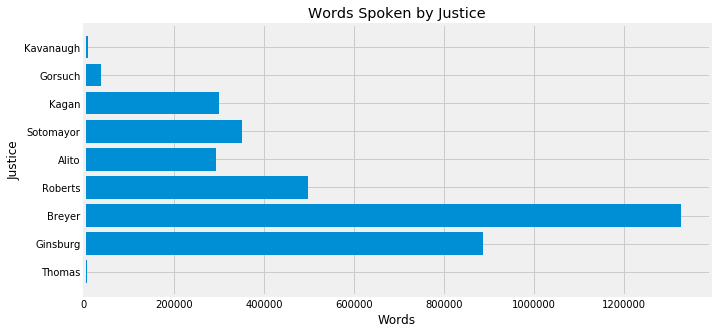

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.barh(names, words)
ax.set_xlabel('Words')
ax.set_ylabel('Justice')
ax.set_title('Words Spoken by Justice')
#fig.savefig('img/words_spoken.png')

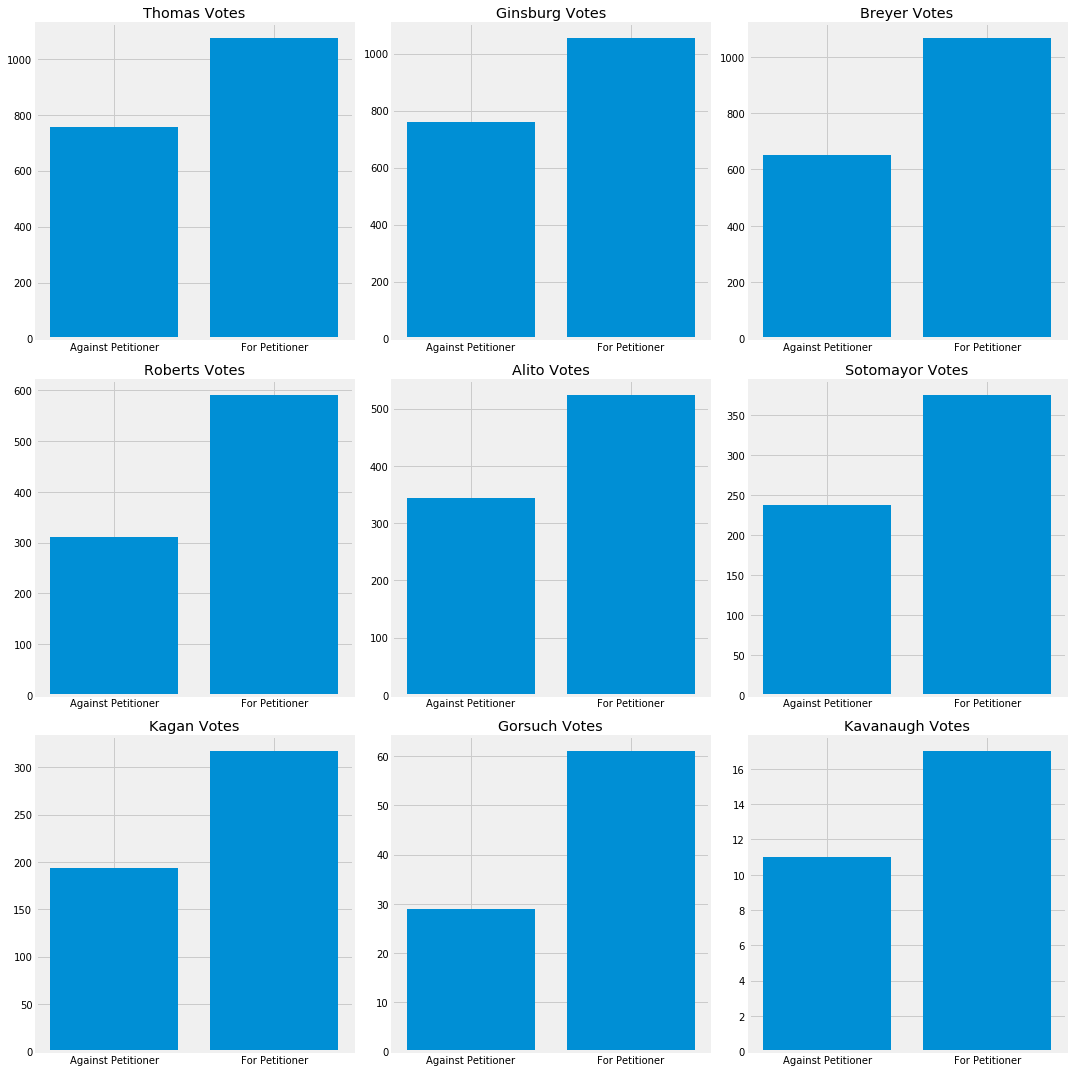

In [6]:
# Plotting the class distribution for each justice

fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, file in enumerate(files):
    fpath = 'data/clean/%s' % file
    df = pd.read_csv(fpath)
    votes = df['vote'].value_counts()
    ax[i // 3][i % 3].bar(votes.index, votes.values)
    ax[i // 3][i % 3].set_title('%s Votes' % names[i])
    ax[i // 3][i % 3].set_xticks([0, 1])
    ax[i // 3][i % 3].set_xticklabels(['Against Petitioner', 'For Petitioner'])
fig.tight_layout()
fig.savefig('img/vote_distribution.png')

In [7]:
# Plotting the distribution for the entire court

whole_df = pd.DataFrame()

for file in files:
    fpath = 'data/clean/%s' % file
    df = pd.read_csv(fpath)
    whole_df = whole_df.append(df)

[Text(0, 0, 'Against Petitioner'), Text(0, 0, 'For Petitioner')]

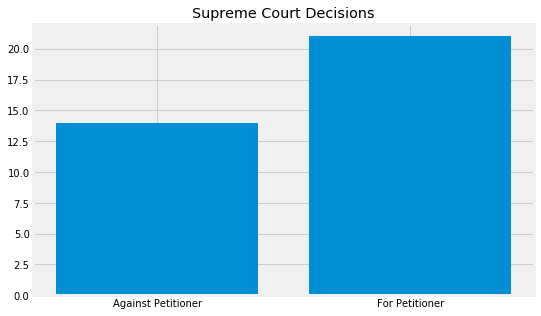

In [8]:
total_votes = whole_df[whole_df['term'] == 2018].groupby('docket')['vote'].sum()

respondent_wins = len(total_votes[total_votes < 5])
petitioner_wins = len(total_votes[total_votes >= 5])

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar([0, 1], [respondent_wins, petitioner_wins])
ax.set_title('Supreme Court Decisions')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Against Petitioner', 'For Petitioner'])